In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize as opt

def throughoutOutliers(data):
    count =0
    return data


In [2]:
current=.9867e-6

trail1 =np.loadtxt("norm/1011_RXC.txt",) ## not good carbon data
#trail1[0]=throughoutOutliers(trail1[0])
#trail1[1]=throughoutOutliers(trail1[1])
#trail1[2]=throughoutOutliers(trail1[2])
#trail1[3]=throughoutOutliers(trail1[3])
trail2 =np.loadtxt("norm/1013_RXC.txt",)
trail2[0]=throughoutOutliers(trail2[0])
trail2[1]=throughoutOutliers(trail2[1])
trail2[2]=throughoutOutliers(trail2[2])
trail2[3]=throughoutOutliers(trail2[3])
trail2[0]=savgol_filter(trail2[0], 25, 3)
trail2[1]=savgol_filter(trail2[1], 25, 3)/-current
trail2[2]=savgol_filter(trail2[2], 25, 3)/-current
trail2[3]=savgol_filter(trail2[3], 25, 3)/current

trail3 =np.loadtxt("norm/1013_RXCa.txt",)
trail3[0]=throughoutOutliers(trail3[0])
trail3[1]=throughoutOutliers(trail3[1])
trail3[2]=throughoutOutliers(trail3[2])
trail3[3]=throughoutOutliers(trail3[3])
trail3[0]=savgol_filter(trail3[0], 25, 3)
trail3[1]=savgol_filter(trail3[1], 25, 3)/-current
trail3[2]=savgol_filter(trail3[2], 25, 3)/-current
trail3[3]=savgol_filter(trail3[3], 25, 3)/current



trail4 =np.loadtxt("norm/1016_RXC.txt",)
trail4[0]=throughoutOutliers(trail4[0])
trail4[1]=throughoutOutliers(trail4[1])/-current
trail4[2]=throughoutOutliers(trail4[2])/-current
trail4[3]=throughoutOutliers(trail4[3])/current
#trail4[0]=savgol_filter(trail4[0], 25, 3)
#trail4[1]=savgol_filter(trail4[1], 40, 1)
#trail4[2]=savgol_filter(trail4[2], 25, 1)
#trail4[3]=savgol_filter(trail4[3], 25, 3)



trail5 =np.loadtxt("norm/1016_RXCb.txt",)
trail5[0]=throughoutOutliers(trail5[0])
trail5[1]=throughoutOutliers(trail5[1])
trail5[2]=throughoutOutliers(trail5[2])
trail5[3]=throughoutOutliers(trail5[3])
trail5[0]=savgol_filter(trail5[0], 25, 3)
trail5[1]=savgol_filter(trail5[1], 25, 3)/-current
trail5[2]=savgol_filter(trail5[2], 25, 3)/-current
trail5[3]=savgol_filter(trail5[3], 25, 3)/current


trails1 =np.loadtxt("norm/1017_RXC_super1.txt",)
trails2 =np.loadtxt("norm/1017_RXC_super2.txt",)
trails3 =np.loadtxt("norm/1017_RXC_super3.txt",)

dunktrail=[None,trail1,trail2,trail3,trail4,trail5]

In [3]:
tempconversion=np.flip(pd.read_csv("Si_Diode_Specs_New.csv", header=None).to_numpy().T,axis=1)


In [4]:
tempconspline= inter.InterpolatedUnivariateSpline(tempconversion[1],tempconversion[0])


In [5]:
trail= 4
xrange=np.arange(0,len(dunktrail[trail][0])*.4,.4)
dunktrail[trail][0]=tempconspline(dunktrail[trail][0])
firstspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][0])
secondspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][1])
thirdspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][2])
fourthspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][3])
splines=[firstspline,secondspline,thirdspline,fourthspline]

Text(0.5, 1.0, 'material c')

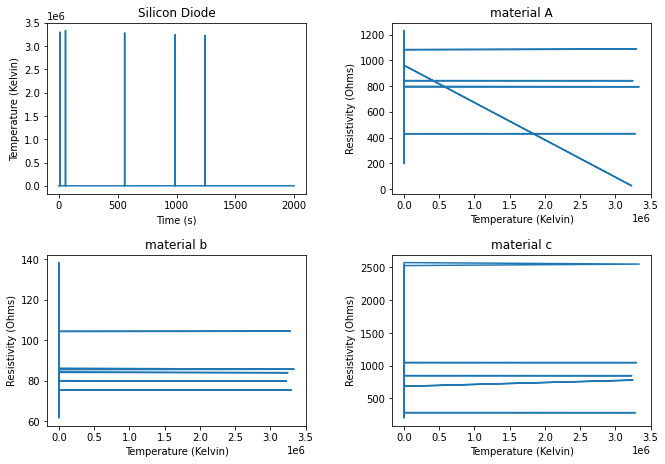

In [6]:
xfinerange=np.arange(0,len(dunktrail[trail][0])*.4,.4)

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=1.5)
fig.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
ax[0][0].plot(xfinerange,splines[0](xfinerange))
ax[0][0].set_ylabel("Temperature (Kelvin)")
ax[0][0].set_xlabel("Time (s)")
ax[0][0].set_title("Silicon Diode")
ax[0][1].plot(splines[0](xfinerange),splines[1](xfinerange))
ax[0][1].set_ylabel("Resistivity (Ohms)")
ax[0][1].set_xlabel("Temperature (Kelvin)")
ax[0][1].set_title("material A")
ax[1][0].plot(splines[0](xfinerange),splines[2](xfinerange))
ax[1][0].set_ylabel("Resistivity (Ohms)")
ax[1][0].set_xlabel("Temperature (Kelvin)")
ax[1][0].set_title("material b")
ax[1][1].plot(splines[0](xfinerange),splines[3](xfinerange))
ax[1][1].set_ylabel("Resistivity (Ohms)")
ax[1][1].set_xlabel("Temperature (Kelvin)")
ax[1][1].set_title("material c")

Text(203.36818181818177, 0.5, 'Change in Resistivity (Ohms)')

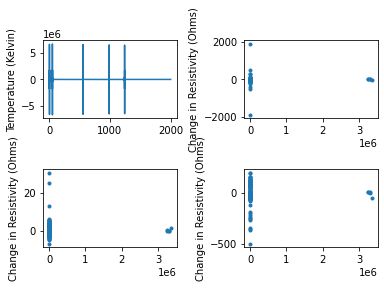

In [7]:


fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=3)
ax[0][0].plot(xfinerange,splines[0](xfinerange,nu=1))
ax[0][0].set_ylabel("Temperature (Kelvin)")
ax[0][1].plot(splines[0](xfinerange),splines[1](xfinerange,nu=1),'.')
ax[0][1].set_ylabel("Change in Resistivity (Ohms)")
ax[1][0].plot(splines[0](xfinerange),splines[2](xfinerange,nu=1),'.')
ax[1][0].set_ylabel("Change in Resistivity (Ohms)")
ax[1][1].plot(splines[0](xfinerange),splines[3](xfinerange,nu=1),'.')
ax[1][1].set_ylabel("Change in Resistivity (Ohms)")

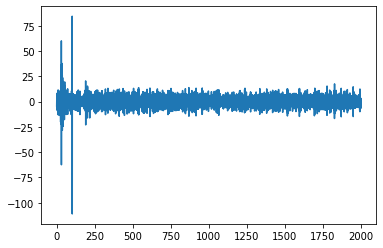

In [8]:
plt.plot(xfinerange,splines[2](xfinerange,nu=2))

In [9]:
len(trail4[1])

5000

In [10]:

trail4 =np.loadtxt("norm/1016_RXC.txt",)

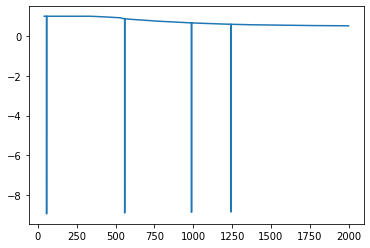

In [11]:
xaxis=np.arange( 0,len(trail4[0])*.4,.4)
plt.plot(xaxis[100::],throughoutOutliers(trail4[0][100::]))

In [12]:
len(trail4[0])*.4

2000.0

In [13]:
throughoutOutliers(trail4[0][100:150])

array([ 1.019705,  1.01977 ,  1.019775,  1.019709,  1.019777,  1.019726,
        1.019747,  1.019742,  1.019692,  1.019734,  1.019753,  1.019738,
        1.0197  ,  1.019666,  1.019657,  1.019575,  1.019635,  1.019646,
        1.019716,  1.019777,  1.019672,  1.019684,  1.019651,  1.019555,
        1.019572,  1.019642,  1.019654,  1.019727,  1.01968 ,  1.019622,
        1.019669,  1.019694,  1.019718,  1.019627,  1.0197  ,  1.019687,
        1.01971 ,  1.019605,  1.019687, -8.968275,  1.019652,  1.019665,
        1.019683,  1.019693,  1.0197  ,  1.019769,  1.019741,  1.019693,
        1.019631,  1.019755])

In [14]:
trail4[0][100:150]

array([ 1.019705,  1.01977 ,  1.019775,  1.019709,  1.019777,  1.019726,
        1.019747,  1.019742,  1.019692,  1.019734,  1.019753,  1.019738,
        1.0197  ,  1.019666,  1.019657,  1.019575,  1.019635,  1.019646,
        1.019716,  1.019777,  1.019672,  1.019684,  1.019651,  1.019555,
        1.019572,  1.019642,  1.019654,  1.019727,  1.01968 ,  1.019622,
        1.019669,  1.019694,  1.019718,  1.019627,  1.0197  ,  1.019687,
        1.01971 ,  1.019605,  1.019687, -8.968275,  1.019652,  1.019665,
        1.019683,  1.019693,  1.0197  ,  1.019769,  1.019741,  1.019693,
        1.019631,  1.019755])